In [6]:
%reload_ext autoreload
%autoreload 2

In [7]:
import matplotlib.pyplot as plt

from mcopt import MorseComplex, MorseGraph, ot

In [8]:
profiles = [
  {
    'dist': 'adj',
    'measure': 'uniform',
    'title': 'Uniform measure & Adjacency Matrix'
  },
  {
    'dist': 'path_length',
    'measure': 'uniform',
    'title': 'Uniform measure & Path Length Matrix',
  },
  {
    'dist': 'geo_dist',
    'measure': 'uniform',
    'title': 'Uniform measure & Geodesic Length Matrix',
  },
  
  {
    'dist': 'adj',
    'measure': 'degree',
    'title': 'Degree measure & Adjacency Matrix'
  },
  {
    'dist': 'path_length',
    'measure': 'degree',
    'title': 'Degree measure & Path Length Matrix',
  },
  {
    'dist': 'geo_dist',
    'measure': 'degree',
    'title': 'Degree measure & Geodesic Length Matrix',
  },
]

# Construct Morse Graphs

In [9]:
src = MorseGraph.from_complex(MorseComplex.read('../gen_complexes/navierstokes1')).sample(5)
dest = MorseGraph.from_complex(MorseComplex.read('../gen_complexes/navierstokes2')).sample(5)

# Run Unbalanced Gromov-Wasserstein Optimal Transport
## Go get some coffee, this is gonna take a while...


In [20]:
for profile in profiles:
  src_mp = src.to_mp(dist=profile['dist'], measure=profile['measure'])
  dest_mp = dest.to_mp(dist=profile['dist'], measure=profile['measure'])
  
  profile['coupling'] = ot.uGW(src_mp, dest_mp, rho=100)

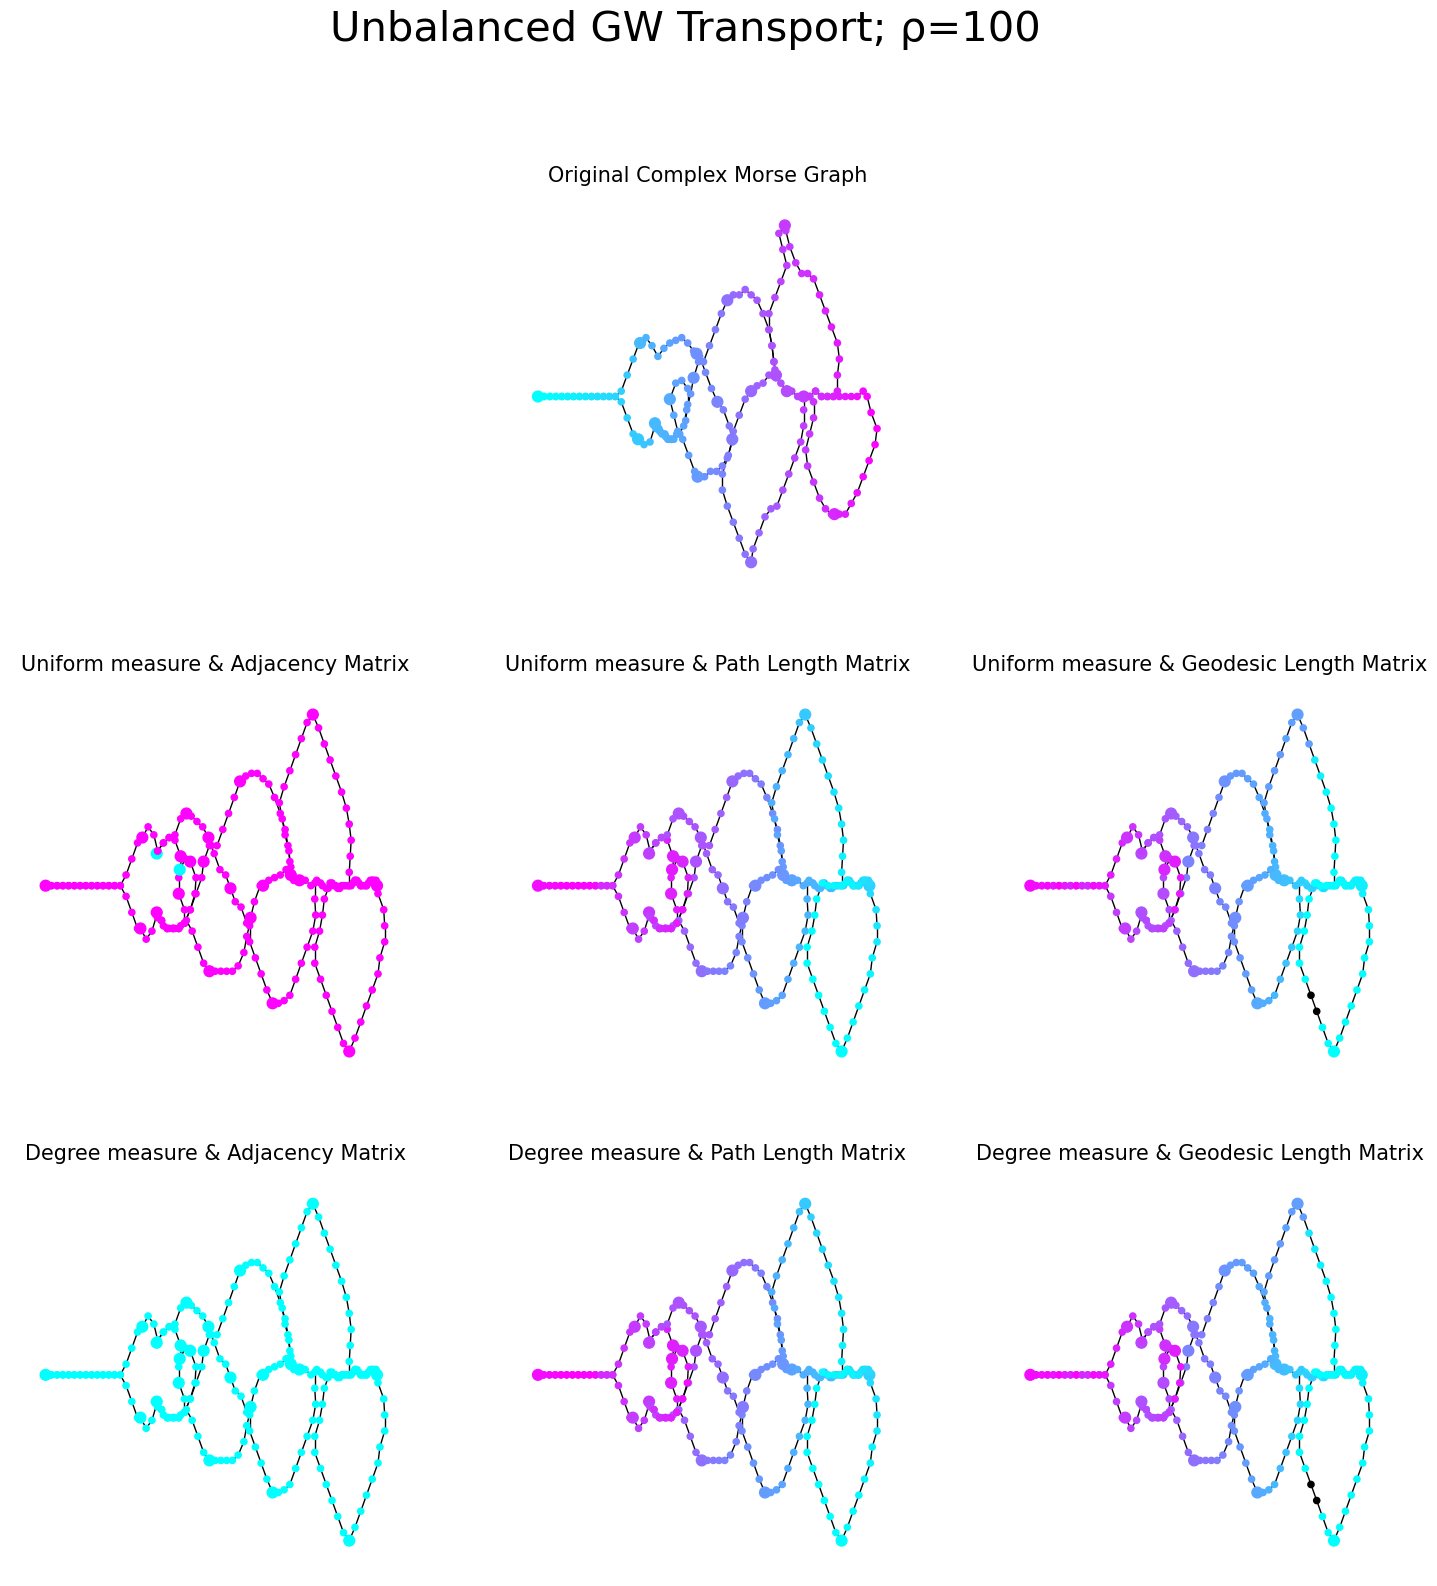

In [21]:
w = len(profiles) // 2
h = 3
cmap = 'cool'

fig, axes = plt.subplots(h, w, figsize=(6 * w, 6 * h))
fig.suptitle('Unbalanced GW Transport; ρ=100', fontsize=30)

for ax in axes.ravel():
  ax.set_axis_off()
  
src_node_color = src.color_by_position()  
  
src_pos = (0, w // 2)
src.draw(
  ax=axes[src_pos],
  node_size=20,
  node_color=src_node_color,
  cmap=cmap,
)
axes[src_pos].set_title('Original Complex Morse Graph', fontsize=15)

for ax, profile in zip(axes.ravel()[w:], profiles):
  dest.draw(
    ax=ax,
    node_size=20,
    node_color=dest.color_by_coupling(src_node_color, profile['coupling']),
    cmap=cmap
  )
  ax.set_title(profile['title'], fontsize=15)